<a href="https://colab.research.google.com/github/ASHEESHPATEL1996/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# Importing the packages and reading the datasets

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing the reqired packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
# reading the data set from the google drive

file_path = '/content/drive/MyDrive/AlmaBetter/Capstone Project/Play Store/'
store_df = pd.read_csv(file_path +'Play Store Data.csv')
review_df = pd.read_csv(file_path + 'User Reviews.csv')

# print the info of the dataset 

In [4]:
# getting insight from the store dataset
print(store_df.shape)
print(store_df.head())
print(store_df.tail())
print(store_df.columns)
print(store_df.info())
print(store_df.isna().sum())

(10841, 13)
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Des

In [5]:
# getting some insight from the review dataset
print(review_df.head())
print(review_df.columns)
print(review_df.info())
print(review_df.isna().sum())
print(review_df.shape)

                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  
Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6

# Cleaning the data sets

In [6]:
# we can also drop some duplicate

store_df = store_df.drop_duplicates()
print(store_df.shape)

(10358, 13)


In [7]:
# To change the dataset type from object to int/float we have to remove the characters
store_df['Installs'] = store_df['Installs'].apply(lambda x: x.replace('+',''))
store_df['Installs'] = store_df['Installs'].apply(lambda x: x.replace(',',''))
store_df['Price'] = store_df['Price'].apply(lambda x: x.replace('$',''))
store_df['Size'] = store_df['Size'].apply(lambda x: x.replace('M','000000'))
store_df['Size'] = store_df['Size'].apply(lambda x: x.replace('K','000'))
store_df['Size'] = store_df['Size'].apply(lambda x: x.replace('k','000'))

In [8]:
store_df.Price.unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       'Everyone', '1.20', '1.04'], dtype=object)

Here we can see that in price column a value is ***'Everyone'*** is string and all other values are **int in form of string** so we have to remove that Row.

In [9]:
store_df.drop(store_df[store_df['Price']=='Everyone'].index,inplace=True)

In [10]:
store_df.Size.unique()

array(['19000000', '14000000', '8.7000000', '25000000', '2.8000000',
       '5.6000000', '29000000', '33000000', '3.1000000', '28000000',
       '12000000', '20000000', '21000000', '37000000', '2.7000000',
       '5.5000000', '17000000', '39000000', '31000000', '4.2000000',
       '7.0000000', '23000000', '6.0000000', '6.1000000', '4.6000000',
       '9.2000000', '5.2000000', '11000000', '24000000',
       'Varies with device', '9.4000000', '15000000', '10000000',
       '1.2000000', '26000000', '8.0000000', '7.9000000', '56000000',
       '57000000', '35000000', '54000000', '201000', '3.6000000',
       '5.7000000', '8.6000000', '2.4000000', '27000000', '2.5000000',
       '16000000', '3.4000000', '8.9000000', '3.9000000', '2.9000000',
       '38000000', '32000000', '5.4000000', '18000000', '1.1000000',
       '2.2000000', '4.5000000', '9.8000000', '52000000', '9.0000000',
       '6.7000000', '30000000', '2.6000000', '7.1000000', '3.7000000',
       '22000000', '7.4000000', '6.4000000

here we can see a value **'Varies with device'** can cause problems so we have to remove that column

In [11]:
store_df.drop(store_df[store_df['Size']=='Varies with device'].index,inplace=True)

# Changing the data types of some columns from object to int/float or datetime

In [12]:
store_df['Installs'] = store_df['Installs'].astype('float')
store_df['Price'] = store_df['Price'].astype('float')
store_df['Size'] = store_df['Size'].astype('float')
store_df['Reviews'] = store_df['Reviews'].astype('float')

In [13]:
store_df['Last Updated'] = pd.to_datetime(store_df['Last Updated'])

# Filling the missing values


In [14]:
# we can fill missing values of rating column with 0 because of unavilability of rating
store_df.Rating.fillna(0,inplace= True)

# Exploring the Dataset

Number of categories =  33
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


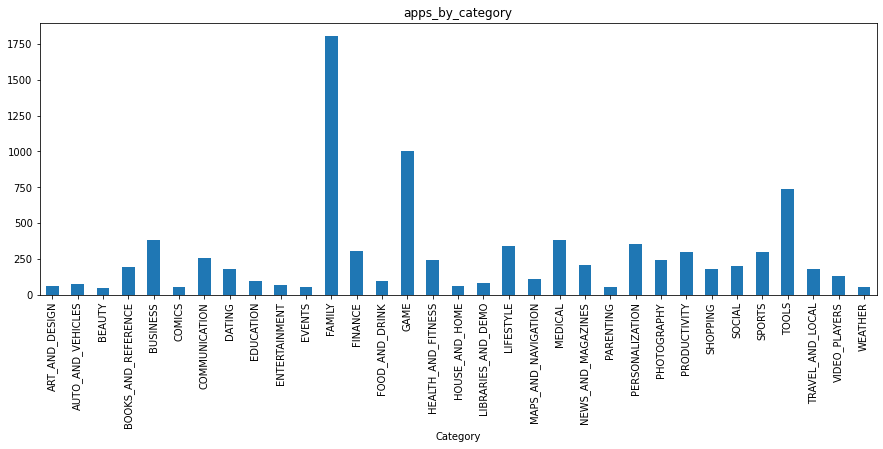

Category
ART_AND_DESIGN           62
AUTO_AND_VEHICLES        75
BEAUTY                   47
BOOKS_AND_REFERENCE     196
BUSINESS                379
COMICS                   51
COMMUNICATION           260
DATING                  178
EDUCATION                96
ENTERTAINMENT            67
EVENTS                   57
FAMILY                 1806
FINANCE                 304
FOOD_AND_DRINK           98
GAME                   1000
HEALTH_AND_FITNESS      240
HOUSE_AND_HOME           62
LIBRARIES_AND_DEMO       82
LIFESTYLE               338
MAPS_AND_NAVIGATION     108
MEDICAL                 380
NEWS_AND_MAGAZINES      209
PARENTING                54
PERSONALIZATION         354
PHOTOGRAPHY             243
PRODUCTIVITY            299
SHOPPING                181
SOCIAL                  203
SPORTS                  296
TOOLS                   739
TRAVEL_AND_LOCAL        179
VIDEO_PLAYERS           131
WEATHER                  57
Name: App, dtype: int64


In [15]:
# checking the uique category
print('Number of categories = ', len(store_df.Category.unique()))
print(store_df.Category.unique())

# counting the apps for each unique category
apps_by_category = store_df.groupby('Category')['App'].count()

# ploting the category-wise apps count
plt.figure(figsize=(15,5)) 
apps_by_category.plot(kind = 'bar')
plt.xticks(rotation=90)
plt.title('apps_by_category')
plt.show()
print(apps_by_category)

Here we can see that ***FAMILY*** category has maximum no of apps fallowed by ***Game*** category in play Store.

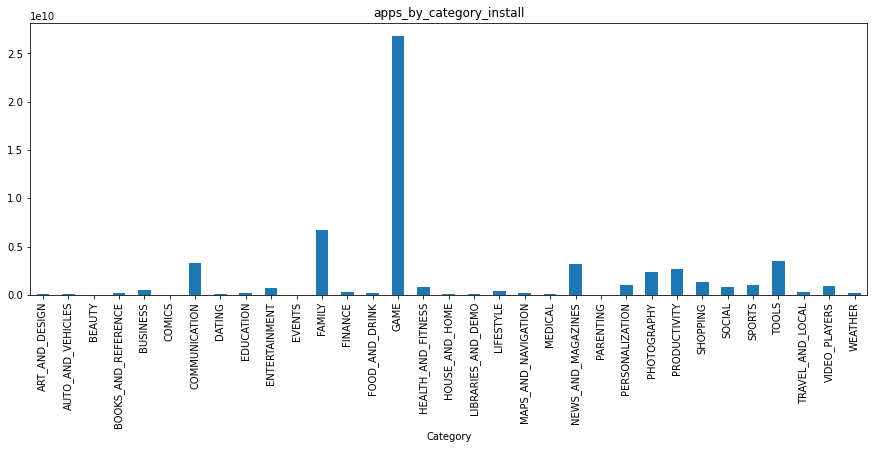

Category
ART_AND_DESIGN         9.933810e+07
AUTO_AND_VEHICLES      4.377021e+07
BEAUTY                 1.369695e+07
BOOKS_AND_REFERENCE    1.349621e+08
BUSINESS               4.919286e+08
COMICS                 1.758615e+07
COMMUNICATION          3.336943e+09
DATING                 1.052061e+08
EDUCATION              2.083020e+08
ENTERTAINMENT          7.489600e+08
EVENTS                 1.067215e+07
FAMILY                 6.697222e+09
FINANCE                3.166235e+08
FOOD_AND_DRINK         1.716887e+08
GAME                   2.680256e+10
HEALTH_AND_FITNESS     8.034619e+08
HOUSE_AND_HOME         5.161246e+07
LIBRARIES_AND_DEMO     6.189591e+07
LIFESTYLE              4.356008e+08
MAPS_AND_NAVIGATION    1.750299e+08
MEDICAL                3.550062e+07
NEWS_AND_MAGAZINES     3.215006e+09
PARENTING              2.397101e+07
PERSONALIZATION        9.971798e+08
PHOTOGRAPHY            2.390898e+09
PRODUCTIVITY           2.711313e+09
SHOPPING               1.312749e+09
SOCIAL             

In [16]:
# category wise installations
apps_by_category_install = store_df.groupby('Category')['Installs'].sum()

# ploting the category-wise apps count
plt.figure(figsize=(15,5)) 
apps_by_category_install.plot(kind = 'bar')
plt.xticks(rotation=90)
plt.title('apps_by_category_install')
plt.show()
print(apps_by_category_install)

In total ***Games*** have highest downloads in play store.

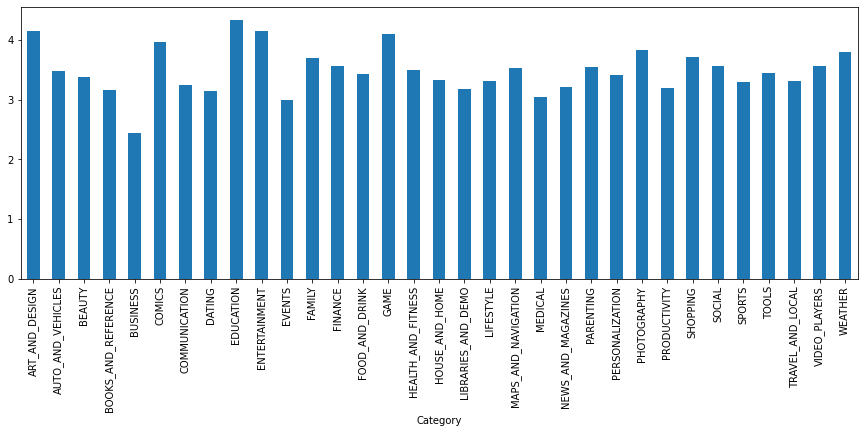

Category
ART_AND_DESIGN         4.150000
AUTO_AND_VEHICLES      3.484000
BEAUTY                 3.378723
BOOKS_AND_REFERENCE    3.153061
BUSINESS               2.434037
COMICS                 3.968627
COMMUNICATION          3.246538
DATING                 3.136517
EDUCATION              4.334375
ENTERTAINMENT          4.155224
EVENTS                 2.985965
FAMILY                 3.690476
FINANCE                3.554934
FOOD_AND_DRINK         3.429592
GAME                   4.090800
HEALTH_AND_FITNESS     3.487917
HOUSE_AND_HOME         3.329032
LIBRARIES_AND_DEMO     3.178049
LIFESTYLE              3.305917
MAPS_AND_NAVIGATION    3.530556
MEDICAL                3.045789
NEWS_AND_MAGAZINES     3.215789
PARENTING              3.542593
PERSONALIZATION        3.408475
PHOTOGRAPHY            3.828395
PRODUCTIVITY           3.199666
SHOPPING               3.711602
SOCIAL                 3.567980
SPORTS                 3.298311
TOOLS                  3.441137
TRAVEL_AND_LOCAL       3.306704

In [17]:
# Getting the insight of category and Rating 
apps_by_category_rating = store_df.groupby('Category')['Rating'].mean()

# ploting the category-wise apps count
plt.figure(figsize=(15,5)) 
apps_by_category_rating.plot(kind = 'bar')
plt.xticks(rotation=90)
plt.show()
print(apps_by_category_rating)

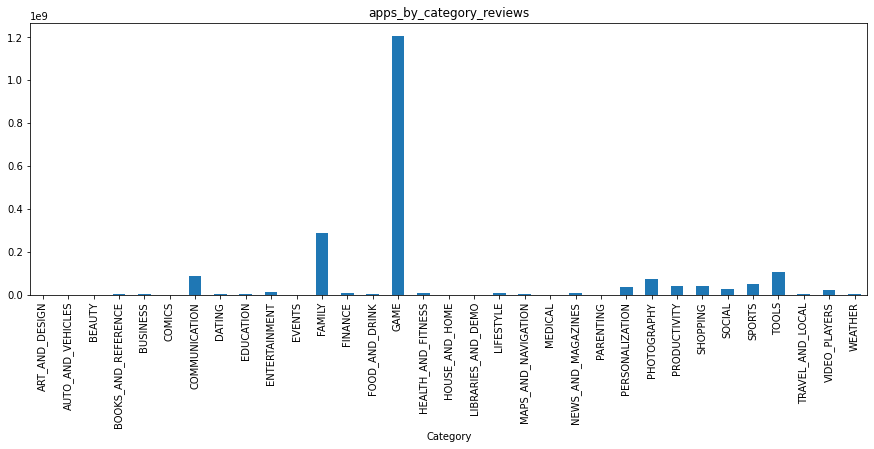

Category
ART_AND_DESIGN         1.087343e+06
AUTO_AND_VEHICLES      9.923220e+05
BEAUTY                 1.868560e+05
BOOKS_AND_REFERENCE    3.968586e+06
BUSINESS               5.427906e+06
COMICS                 6.161940e+05
COMMUNICATION          8.907720e+07
DATING                 2.803552e+06
EDUCATION              5.399463e+06
ENTERTAINMENT          1.094061e+07
EVENTS                 1.266490e+05
FAMILY                 2.884688e+08
FINANCE                1.036616e+07
FOOD_AND_DRINK         4.108688e+06
GAME                   1.206725e+09
HEALTH_AND_FITNESS     8.568712e+06
HOUSE_AND_HOME         9.920330e+05
LIBRARIES_AND_DEMO     1.019467e+06
LIFESTYLE              8.657579e+06
MAPS_AND_NAVIGATION    3.666158e+06
MEDICAL                1.234445e+06
NEWS_AND_MAGAZINES     8.129835e+06
PARENTING              8.847000e+05
PERSONALIZATION        3.485332e+07
PHOTOGRAPHY            7.172162e+07
PRODUCTIVITY           4.264305e+07
SHOPPING               3.951521e+07
SOCIAL             

In [18]:
# Getting the insight of category and Review
apps_by_category_reviews = store_df.groupby('Category')['Reviews'].sum()

# ploting the category-wise apps count
plt.figure(figsize=(15,5)) 
apps_by_category_reviews.plot(kind = 'bar')
plt.xticks(rotation=90)
plt.title('apps_by_category_reviews')
plt.show()
print(apps_by_category_reviews)

Here we can see that ***Games*** have highest numbers of reviews.

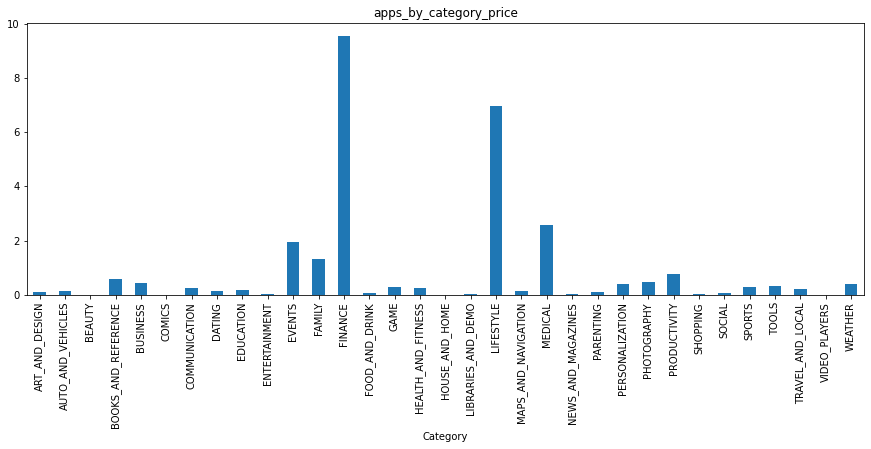

Category
ART_AND_DESIGN         0.096290
AUTO_AND_VEHICLES      0.153067
BEAUTY                 0.000000
BOOKS_AND_REFERENCE    0.595816
BUSINESS               0.428232
COMICS                 0.000000
COMMUNICATION          0.262231
DATING                 0.131742
EDUCATION              0.187083
ENTERTAINMENT          0.044627
EVENTS                 1.929649
FAMILY                 1.310604
FINANCE                9.542204
FOOD_AND_DRINK         0.050918
GAME                   0.279340
HEALTH_AND_FITNESS     0.234917
HOUSE_AND_HOME         0.000000
LIBRARIES_AND_DEMO     0.012073
LIFESTYLE              6.962692
MAPS_AND_NAVIGATION    0.138519
MEDICAL                2.575763
NEWS_AND_MAGAZINES     0.019043
PARENTING              0.092407
PERSONALIZATION        0.399746
PHOTOGRAPHY            0.462305
PRODUCTIVITY           0.779164
SHOPPING               0.030276
SOCIAL                 0.078670
SPORTS                 0.293986
TOOLS                  0.320650
TRAVEL_AND_LOCAL       0.217709

In [19]:
# Getting the insight of category and Price
apps_by_category_price = store_df.groupby('Category')['Price'].mean()

# ploting the category-wise apps count
plt.figure(figsize=(15,5)) 
apps_by_category_price.plot(kind = 'bar')
plt.xticks(rotation=90)
plt.title('apps_by_category_price')
plt.show()
print(apps_by_category_price)

here we can see that on average ***Finance apps*** are costly than other apps fallowed by ***Lifestyle apps***.

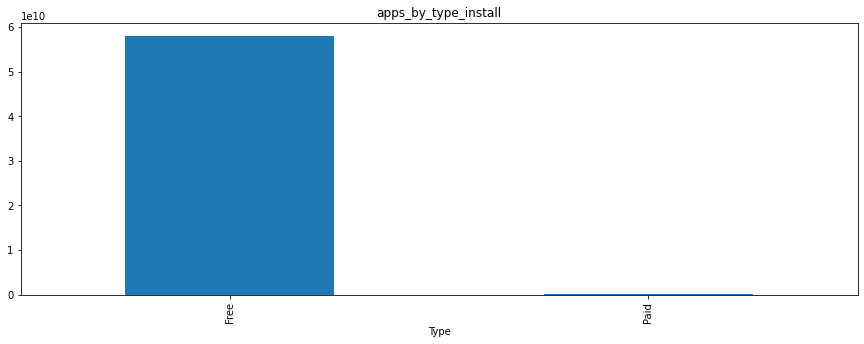

Type
Free    5.804524e+10
Paid    4.408052e+07
Name: Installs, dtype: float64


In [20]:
# Getting the insight of type and installs
apps_by_type_install = store_df.groupby('Type')['Installs'].sum()


# ploting the category-wise apps count
plt.figure(figsize=(15,5)) 
apps_by_type_install.plot(kind = 'bar')
plt.xticks(rotation=90)
plt.title('apps_by_type_install')
plt.show()
print(apps_by_type_install)

here we can see that ***Free Apps*** have higher no of install than ***Paid Apps***

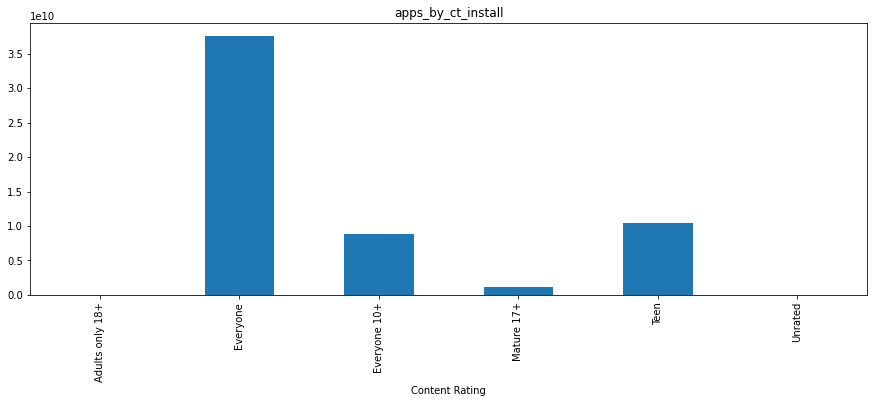

Content Rating
Adults only 18+    1.500000e+06
Everyone           3.756565e+10
Everyone 10+       8.864662e+09
Mature 17+         1.194665e+09
Teen               1.046280e+10
Unrated            5.050000e+04
Name: Installs, dtype: float64


In [21]:
# Getting the insight of price and installs
apps_by_ct_install = store_df.groupby('Content Rating')['Installs'].sum()


# ploting the category-wise apps count
plt.figure(figsize=(15,5)) 
apps_by_ct_install.plot(kind = 'bar')
plt.xticks(rotation=90)
plt.title('apps_by_ct_install')
plt.show()
print(apps_by_ct_install)

In app store **apps/games** used by everyone have higher no of downloads.

In [22]:
store_df['Revenue'] = store_df.Price*store_df.Installs

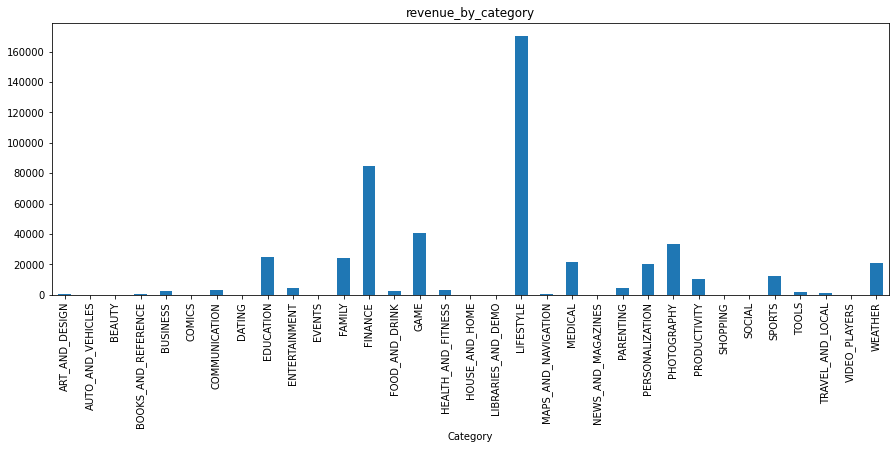

In [23]:
plt.figure(figsize=(15,5)) 
store_df.groupby('Category')['Revenue'].mean().plot(kind = 'bar')
plt.title('revenue_by_category')
plt.show()

for paid category ***lifestyle apps*** got highest average revenue from app store 

In [24]:
# getting the top 10 junck apps
today = dt.datetime.today().year
less_rated = store_df[store_df['Rating']<=1]
less_rated['years_from_last_update'] = less_rated['Last Updated'].apply(lambda x: today-x.year )
less_rated.sort_values(['Price','years_from_last_update'],ascending = [False,False])[:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue,years_from_last_update
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,0.0,0.0,40000000.0,0.0,Paid,399.99,Everyone,Lifestyle,2017-12-01,MONEY,4.1 and up,0.00,5
9917,Eu Sou Rico,FINANCE,0.0,0.0,1.4,0.0,Paid,394.99,Everyone,Finance,2018-07-11,1.0,4.0.3 and up,0.00,4
9719,EP Cook Book,MEDICAL,0.0,0.0,3.2,0.0,Paid,200.00,Everyone,Medical,2015-07-26,1.0,3.0 and up,0.00,7
6692,cronometra-br,PRODUCTIVITY,0.0,0.0,5.4,0.0,Paid,154.99,Everyone,Productivity,2017-11-24,1.0.0,4.1 and up,0.00,5
6624,BP Fitness Lead Scanner,EVENTS,0.0,0.0,6.7,1.0,Paid,109.99,Everyone,Events,2017-08-23,0.0.1,4.1 and up,109.99,5
9730,Lean EQ,BUSINESS,0.0,6.0,10000000.0,10.0,Paid,89.99,Everyone,Business,2017-02-14,1.0,4.1 and up,899.90,5
2390,Language Therapy: Aphasia,MEDICAL,0.0,10.0,28000000.0,1000.0,Paid,74.99,Everyone,Medical,2018-06-25,3.1.1,4.0.3 and up,74990.00,4
6559,Dr.Dice - Sic bo analyzer,FAMILY,0.0,2.0,8.5,10.0,Paid,46.99,Everyone,Entertainment,2016-11-05,1.0,4.0.3 and up,469.90,6
4134,Norwegian For Kids & Babies F,FAMILY,0.0,0.0,14000000.0,5.0,Paid,39.99,Everyone,Education,2015-09-24,1.0,4.0 and up,199.95,7
9905,Eu sou Rico,FINANCE,0.0,0.0,2.6,0.0,Paid,30.99,Everyone,Finance,2018-01-09,1.0,4.0 and up,0.00,4


In [25]:
store_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,0.0,0.0,9.6,10.0,Free,0.0,Everyone,Business,2016-09-29,1.1.5,4.0 and up,0.0
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000000.0,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,0.0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100.0,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,0.0
10838,Parkinson Exercices FR,MEDICAL,0.0,3.0,9.5,1000.0,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,0.0


# Merge the store data to review data and print some info

In [26]:
merge_df = store_df.merge(review_df)

In [27]:
print(merge_df.head())
print(merge_df.info())
print(merge_df.isna().sum())

                   App        Category  Rating  Reviews        Size  Installs  \
0  Coloring book moana  ART_AND_DESIGN     3.9    967.0  14000000.0  500000.0   
1  Coloring book moana  ART_AND_DESIGN     3.9    967.0  14000000.0  500000.0   
2  Coloring book moana  ART_AND_DESIGN     3.9    967.0  14000000.0  500000.0   
3  Coloring book moana  ART_AND_DESIGN     3.9    967.0  14000000.0  500000.0   
4  Coloring book moana  ART_AND_DESIGN     3.9    967.0  14000000.0  500000.0   

   Type  Price Content Rating                     Genres Last Updated  \
0  Free    0.0       Everyone  Art & Design;Pretend Play   2018-01-15   
1  Free    0.0       Everyone  Art & Design;Pretend Play   2018-01-15   
2  Free    0.0       Everyone  Art & Design;Pretend Play   2018-01-15   
3  Free    0.0       Everyone  Art & Design;Pretend Play   2018-01-15   
4  Free    0.0       Everyone  Art & Design;Pretend Play   2018-01-15   

  Current Ver   Android Ver  Revenue  \
0       2.0.0  4.0.3 and up      0

In [28]:
merge_df.drop('Translated_Review',axis=1,inplace=True)

In [29]:
merge_df.dropna(subset = ['Sentiment_Subjectivity','Sentiment_Polarity','Sentiment'],inplace=True)

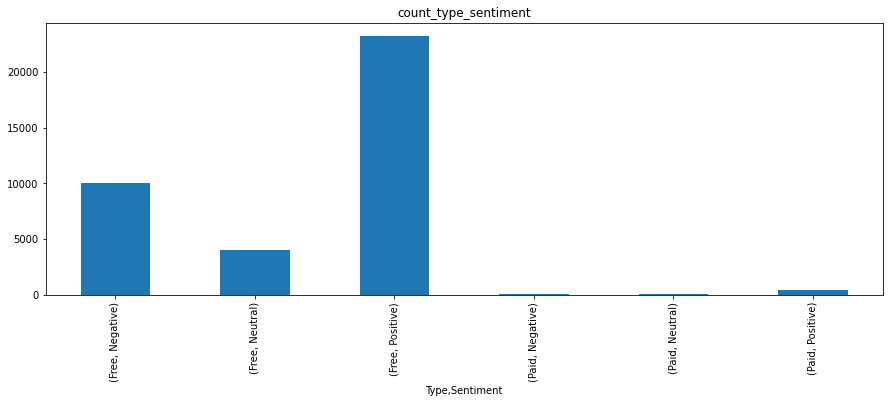

In [30]:
plt.figure(figsize=(15,5)) 
merge_df.groupby(['Type','Sentiment'])['App'].count().plot(kind = 'bar')
plt.title('count_type_sentiment')
plt.show()

***Free Apps with Positive sentiment are highest  count in play store***

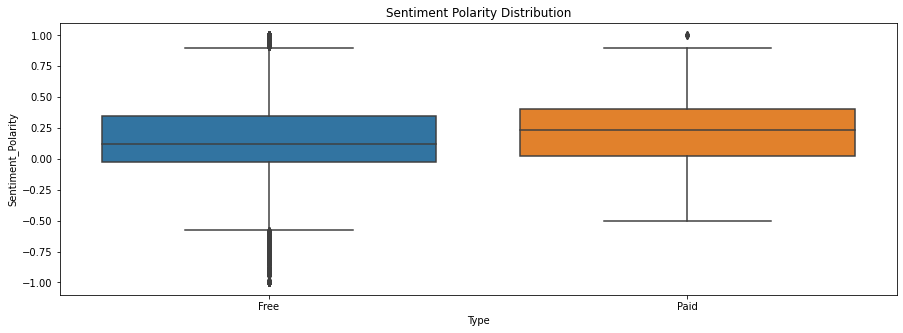

Type
Free    0.151024
Paid    0.219055
Name: Sentiment_Polarity, dtype: float64

In [31]:
# User review sentiment polarity for paid vs. free apps
plt.figure(figsize=(15,5)) 
sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merge_df)
plt.title('Sentiment Polarity Distribution')
plt.show()
merge_df.groupby('Type')['Sentiment_Polarity'].mean()

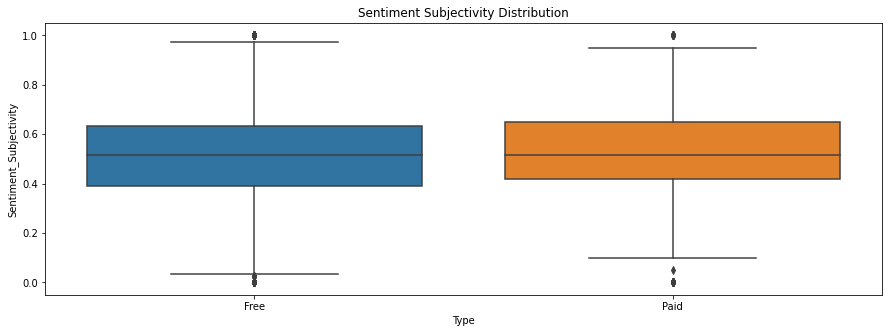

Type
Free    0.499018
Paid    0.514377
Name: Sentiment_Subjectivity, dtype: float64

In [32]:
plt.figure(figsize=(15,5)) 
sns.boxplot(x = 'Type', y = 'Sentiment_Subjectivity', data = merge_df)
plt.title('Sentiment Subjectivity Distribution')
plt.show()
merge_df.groupby('Type')['Sentiment_Subjectivity'].mean()

# Conclusion

With the Eda we got these inferences- 

1.    FAMILY category has maximum no of apps fallowed by the GAME category in play Store.
2.   GAME category has the maximun no of installes apps in Play store.
3.   GAME category has the maximun no of reviews of apps in Play store.
4.   On average Finance Apps are costly than other apps fallowed by LifeStyle Apps.
5.   Free Apps have the higher no of installs than the paid ones.
6.   In apps store appes/games used by Every One have highest no of Installs.
7.   Free Apps with Positive sentiment are highest  count in play store.
8.   For paid category lifestyle apps got highest average revenue from app store.
9.   Paid apps have higher average sentiment polarity than Free apps.Both the paid and Free apps have Positive average sentiment polarity.
10.  Paid apps are very little ahead of average sentiment subjectivity than free apps. 
11.  There are some apps that have average reviews lowest and price of the apps is one highest end and have not been updated since multiple years we should consider these apps junk apps or fake apps.



# Business insights

*   If you are a app creater and you create free apps then your focus should be on creating such games which should be suitalbe for all Age groups
*   If you are a app creaater and you create paid apps then your focus should be on creating Finance and Lifestyle apps.
*   If you are are advatiser your focus should be on Games for the promations of your product.
*   If you are a play store Official your focus should be removing junk and fake apps and also consider high advartising fee from customers, for apps having positive average sentiment plaraity.
*   also for promations of apps you should you should consider promating Finance apps.
*   For the play store users, they should consider for paid apps for serius tasks.

